In [29]:
import os, sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.environ['PYTHONPATH'] = project_root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("PYTHONPATH manually set to:", os.environ['PYTHONPATH'])

PYTHONPATH manually set to: c:\Users\ndhaj\Desktop\GraphicalPR


In [30]:
import numpy as np
import matplotlib.pyplot as plt

from graph.structure.graph import Graph
from graph.prior.gaussian_prior import GaussianPrior
from graph.propagator.unitary_propagator import UnitaryPropagator
from graph.measurement.gaussian_measurement import GaussianMeasurement
from core.metrics import mse
from core.linalg_utils import random_unitary_matrix

In [31]:
# ==== Parameters ====
n = 64
shape = (n,)
rng = np.random.default_rng(seed=42)
U = random_unitary_matrix(n, rng=rng)
var = 1e-4

In [32]:
class AddTestGraph(Graph):
    def __init__(self):
        super().__init__()
        # Assign labeled priors
        A = GaussianPrior(var=1.0, shape=shape, label="A")
        B = GaussianPrior(var=1.0, shape=shape, label="B")

        # Add intermediate and output factors
        C = UnitaryPropagator(U) @ A
        self.D = GaussianMeasurement(var=var) @ C
        self.E = GaussianMeasurement(var=var) @ (A + B)

        self.compile()

In [33]:
# ==== Initialization ====
g = AddTestGraph()

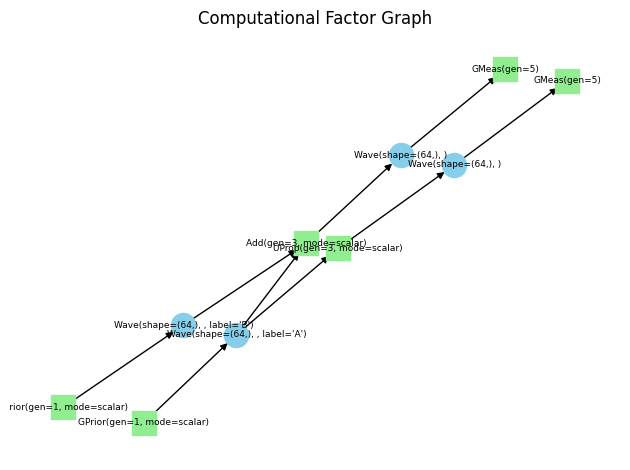

In [34]:
g.visualize(layout="kamada_kawai", font_size=6.5, scale=2.0)

In [35]:
g.set_init_rng(np.random.default_rng(seed=1))
g.generate_sample(rng=np.random.default_rng(seed=999), update_observed=True)

In [36]:
true_a = g.get_wave("B").get_sample()

In [37]:
def monitor(graph, t):
    B = graph.get_wave("B")
    est = B.compute_belief().data
    err = mse(est, true_a)
    if t % 10 == 0:
        print(f"[t={t}] MSE = {err:.5e}")

In [38]:
g.run(n_iter=100, callback=monitor)

[t=0] MSE = 1.54430e+00
[t=10] MSE = 3.64300e-04
[t=20] MSE = 3.64300e-04
[t=30] MSE = 3.64300e-04
[t=40] MSE = 3.64300e-04
[t=50] MSE = 3.64300e-04
[t=60] MSE = 3.64300e-04
[t=70] MSE = 3.64300e-04
[t=80] MSE = 3.64300e-04
[t=90] MSE = 3.64300e-04
